# Layout Testing

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

creating graph

In [2]:
g = nx.Graph()

g.add_nodes_from(["EX",
                  "Z1", "A1", "A2", "A3", "A4", "A5", "Z7",
                  "Z2", "B1", "B2", "B3", "B4", "B5", "Z8",
                  "Z3", "C1", "C2", "C3", "C4", "C5", "Z9",
                  "Z4", "D1", "D2", "D3", "D4", "D5", "Z0",
                  "Z5", "E1", "E2", "E3", "E4", "E5", "Y1",
                  "Z6", "F1", "F2", "F3", "F4", "F5", "Y2"])

g.add_edges_from([("EX", "Z1"), ("Z1", "Z2"), ("Z2", "Z3"), ("Z3", "Z4"),
                  ("Z4", "Z5"), ("Z5", "Z6"),
                  ("Z7", "Z8"), ("Z8", "Z9"), ("Z9", "Z0"), ("Z0", "Y1"),
                  ("Y1", "Y2"),

                  ("Z1", "A1"), ("Z2", "B1"), ("Z3", "C1"), ("Z4", "D1"),
                  ("Z5", "E1"), ("Z6", "F1"), ("Z7", "A5"), ("Z8", "B5"),
                  ("Z9", "C5"), ("Z0", "D5"), ("Y1", "E5"), ("Y2", "F5"),
                  
                  ("A1", "A2"), ("A2", "A3"), ("A3", "A4"), ("A4", "A5"), 
                  ("B1", "B2"), ("B2", "B3"), ("B3", "B4"), ("B4", "B5"), 
                  ("C1", "C2"), ("C2", "C3"), ("C3", "C4"), ("C4", "C5"),
                  ("D1", "D2"), ("D2", "D3"), ("D3", "D4"), ("D4", "D5"),
                  ("E1", "E2"), ("E2", "E3"), ("E3", "E4"), ("E4", "E5"),
                  ("F1", "F2"), ("F2", "F3"), ("F3", "F4"), ("F4", "F5")
                  ])

setting positions of nodes for layout

In [3]:
pos = {
    "EX": (-1, -1),
    "Z1": (-1, 0),
    "Z2": (-1, 1),
    "Z3": (-1, 2),
    "Z4": (-1, 3),
    "Z5": (-1, 4),
    "Z6": (-1, 5),
    "Z7": (5, 0),
    "Z8": (5, 1),
    "Z9": (5, 2),
    "Z0": (5, 3),
    "Y1": (5, 4),
    "Y2": (5, 5),

    "A1": (0, 0),
    "A2": (1, 0),
    "A3": (2, 0),
    "A4": (3, 0),
    "A5": (4, 0),

    "B1": (0, 1),
    "B2": (1, 1),
    "B3": (2, 1),
    "B4": (3, 1),
    "B5": (4, 1),

    "C1": (0, 2),
    "C2": (1, 2),
    "C3": (2, 2),
    "C4": (3, 2),
    "C5": (4, 2),

    "D1": (0, 3),
    "D2": (1, 3),
    "D3": (2, 3),
    "D4": (3, 3),
    "D5": (4, 3),

    "E1": (0, 4),
    "E2": (1, 4),
    "E3": (2, 4),
    "E4": (3, 4),
    "E5": (4, 4),

    "F1": (0, 5),
    "F2": (1, 5),
    "F3": (2, 5),
    "F4": (3, 5),
    "F5": (4, 5)
}

drawing layout

C:\Users\branl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


{'EX': Text(-1, -1, 'EX'),
 'Z1': Text(-1, 0, 'Z1'),
 'A1': Text(0, 0, 'A1'),
 'A2': Text(1, 0, 'A2'),
 'A3': Text(2, 0, 'A3'),
 'A4': Text(3, 0, 'A4'),
 'A5': Text(4, 0, 'A5'),
 'Z7': Text(5, 0, 'Z7'),
 'Z2': Text(-1, 1, 'Z2'),
 'B1': Text(0, 1, 'B1'),
 'B2': Text(1, 1, 'B2'),
 'B3': Text(2, 1, 'B3'),
 'B4': Text(3, 1, 'B4'),
 'B5': Text(4, 1, 'B5'),
 'Z8': Text(5, 1, 'Z8'),
 'Z3': Text(-1, 2, 'Z3'),
 'C1': Text(0, 2, 'C1'),
 'C2': Text(1, 2, 'C2'),
 'C3': Text(2, 2, 'C3'),
 'C4': Text(3, 2, 'C4'),
 'C5': Text(4, 2, 'C5'),
 'Z9': Text(5, 2, 'Z9'),
 'Z4': Text(-1, 3, 'Z4'),
 'D1': Text(0, 3, 'D1'),
 'D2': Text(1, 3, 'D2'),
 'D3': Text(2, 3, 'D3'),
 'D4': Text(3, 3, 'D4'),
 'D5': Text(4, 3, 'D5'),
 'Z0': Text(5, 3, 'Z0'),
 'Z5': Text(-1, 4, 'Z5'),
 'E1': Text(0, 4, 'E1'),
 'E2': Text(1, 4, 'E2'),
 'E3': Text(2, 4, 'E3'),
 'E4': Text(3, 4, 'E4'),
 'E5': Text(4, 4, 'E5'),
 'Y1': Text(5, 4, 'Y1'),
 'Z6': Text(-1, 5, 'Z6'),
 'F1': Text(0, 5, 'F1'),
 'F2': Text(1, 5, 'F2'),
 'F3': Text(2, 5,

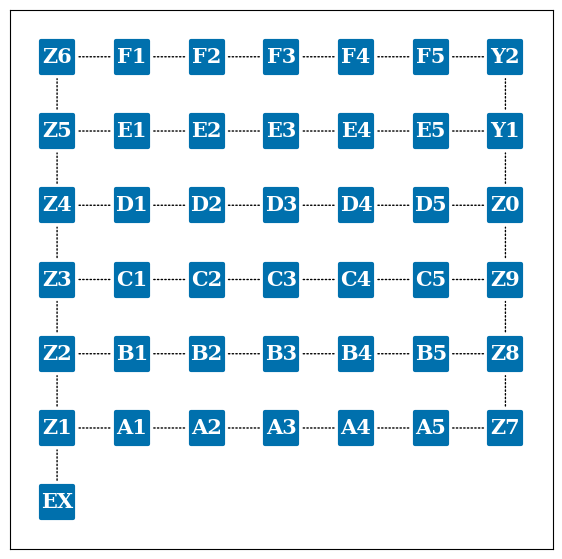

In [4]:
plt.figure(figsize=(7,7))

nx.draw_networkx_nodes(g, pos, node_size=500, node_color=(0, 0.4392, 0.6784), 
                 node_shape='s', linewidths=3
                )

nx.draw_networkx_edges(g, pos, node_size=500, arrows=True,
                 node_shape='s', style=':'
                )

nx.draw_networkx_labels(g, pos, font_size=15, font_color="white", 
                 font_weight="bold", font_family="serif"
                )

# , connectionstyle="arc3,rad=0.5"

finding shortest paths between consecutive nodes

In [5]:
items = ["D2", "C2", "E4", "B4", "B1", "F1", "A1"]
path = []

path.append(items[0])
for x in range(len(items)):
      if x < (len(items) - 1):
            shortest = nx.shortest_path(g, source=items[x], target=items[x + 1])

            print(f"""Shortest path between {items[x]} and {items[x + 1]}:
                  {shortest}""")
            
            for i in range(len(shortest)):
                  if i > 0:
                        path.append(shortest[i])
            
print(f"\nComplete Path:\n{path}")

Shortest path between D2 and C2:
                  ['D2', 'D1', 'Z4', 'Z3', 'C1', 'C2']
Shortest path between C2 and E4:
                  ['C2', 'C1', 'Z3', 'Z4', 'Z5', 'E1', 'E2', 'E3', 'E4']
Shortest path between E4 and B4:
                  ['E4', 'E5', 'Y1', 'Z0', 'Z9', 'Z8', 'B5', 'B4']
Shortest path between B4 and B1:
                  ['B4', 'B3', 'B2', 'B1']
Shortest path between B1 and F1:
                  ['B1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'F1']
Shortest path between F1 and A1:
                  ['F1', 'Z6', 'Z5', 'Z4', 'Z3', 'Z2', 'Z1', 'A1']

Complete Path:
['D2', 'D1', 'Z4', 'Z3', 'C1', 'C2', 'C1', 'Z3', 'Z4', 'Z5', 'E1', 'E2', 'E3', 'E4', 'E5', 'Y1', 'Z0', 'Z9', 'Z8', 'B5', 'B4', 'B3', 'B2', 'B1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'F1', 'Z6', 'Z5', 'Z4', 'Z3', 'Z2', 'Z1', 'A1']


sorting for path efficiency

In [6]:
print(f"Unsorted items: {items}")

aisle_letters = ['A', 'B', 'C', 'D', 'E', 'F']
sorted_items = []

for aisle_letter in aisle_letters:
    for x in range(len(items)):
        if aisle_letter in items[x]:
            sorted_items.append(items[x])

    for x in range(len(sorted_items)):
        if x < (len(sorted_items) - 1):
            if sorted_items[x] > sorted_items[x + 1]:
                temp = sorted_items[x]
                sorted_items[x] = sorted_items[x + 1]
                sorted_items[x + 1] = temp

print(f"Sorted items: {sorted_items}")

Unsorted items: ['D2', 'C2', 'E4', 'B4', 'B1', 'F1', 'A1']
Sorted items: ['A1', 'B1', 'B4', 'C2', 'D2', 'E4', 'F1']


{'EX': Text(-1, -1, 'EX'),
 'Z1': Text(-1, 0, 'Z1'),
 'A1': Text(0, 0, 'A1'),
 'A2': Text(1, 0, 'A2'),
 'A3': Text(2, 0, 'A3'),
 'A4': Text(3, 0, 'A4'),
 'A5': Text(4, 0, 'A5'),
 'Z7': Text(5, 0, 'Z7'),
 'Z2': Text(-1, 1, 'Z2'),
 'B1': Text(0, 1, 'B1'),
 'B2': Text(1, 1, 'B2'),
 'B3': Text(2, 1, 'B3'),
 'B4': Text(3, 1, 'B4'),
 'B5': Text(4, 1, 'B5'),
 'Z8': Text(5, 1, 'Z8'),
 'Z3': Text(-1, 2, 'Z3'),
 'C1': Text(0, 2, 'C1'),
 'C2': Text(1, 2, 'C2'),
 'C3': Text(2, 2, 'C3'),
 'C4': Text(3, 2, 'C4'),
 'C5': Text(4, 2, 'C5'),
 'Z9': Text(5, 2, 'Z9'),
 'Z4': Text(-1, 3, 'Z4'),
 'D1': Text(0, 3, 'D1'),
 'D2': Text(1, 3, 'D2'),
 'D3': Text(2, 3, 'D3'),
 'D4': Text(3, 3, 'D4'),
 'D5': Text(4, 3, 'D5'),
 'Z0': Text(5, 3, 'Z0'),
 'Z5': Text(-1, 4, 'Z5'),
 'E1': Text(0, 4, 'E1'),
 'E2': Text(1, 4, 'E2'),
 'E3': Text(2, 4, 'E3'),
 'E4': Text(3, 4, 'E4'),
 'E5': Text(4, 4, 'E5'),
 'Y1': Text(5, 4, 'Y1'),
 'Z6': Text(-1, 5, 'Z6'),
 'F1': Text(0, 5, 'F1'),
 'F2': Text(1, 5, 'F2'),
 'F3': Text(2, 5,

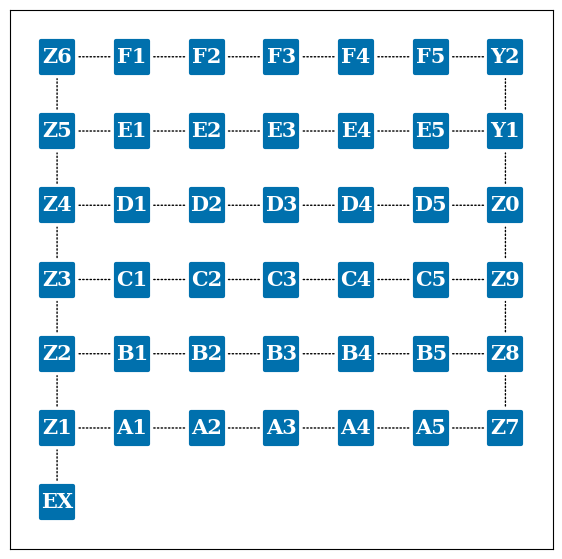

In [9]:
plt.figure(figsize=(7,7))

nx.draw_networkx_nodes(g, pos, node_size=500, node_color=(0, 0.4392, 0.6784), 
                 node_shape='s', linewidths=3
                )

nx.draw_networkx_edges(g, pos, node_size=500, arrows=True,
                 node_shape='s', style=':'
                )

nx.draw_networkx_labels(g, pos, font_size=15, font_color="white", 
                 font_weight="bold", font_family="serif"
                )

# , connectionstyle="arc3,rad=0.5"

calculating path again with sorted list

In [10]:
path = []

path.append(sorted_items[0])
for x in range(len(sorted_items)):
      if x < (len(sorted_items) - 1):
            shortest = nx.shortest_path(g, source=sorted_items[x], target=sorted_items[x + 1])

            print(f"""Shortest path between {sorted_items[x]} and {sorted_items[x + 1]}:
                  {shortest}""")
            
            for i in range(len(shortest)):
                  if i > 0:
                        path.append(shortest[i])
            
print(f"\nComplete Path:\n{path}")

Shortest path between A1 and B1:
                  ['A1', 'Z1', 'Z2', 'B1']
Shortest path between B1 and B4:
                  ['B1', 'B2', 'B3', 'B4']
Shortest path between B4 and C2:
                  ['B4', 'B3', 'B2', 'B1', 'Z2', 'Z3', 'C1', 'C2']
Shortest path between C2 and D2:
                  ['C2', 'C1', 'Z3', 'Z4', 'D1', 'D2']
Shortest path between D2 and E4:
                  ['D2', 'D1', 'Z4', 'Z5', 'E1', 'E2', 'E3', 'E4']
Shortest path between E4 and F1:
                  ['E4', 'E3', 'E2', 'E1', 'Z5', 'Z6', 'F1']

Complete Path:
['A1', 'Z1', 'Z2', 'B1', 'B2', 'B3', 'B4', 'B3', 'B2', 'B1', 'Z2', 'Z3', 'C1', 'C2', 'C1', 'Z3', 'Z4', 'D1', 'D2', 'D1', 'Z4', 'Z5', 'E1', 'E2', 'E3', 'E4', 'E3', 'E2', 'E1', 'Z5', 'Z6', 'F1']
